<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/Wine_Quality_prediction_MULTIPLEMLalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('/content/winequality-red.csv')

In [91]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
for col in df.columns:
  unique = df[col].unique()
  print(f'{col} : {unique}')

fixed acidity : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity : [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0

Remove OUTLIERS

In [94]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

iQR = Q3 - Q1

In [95]:
for col in df.columns:
  df = df[~((df[col] < (Q1[col] - 1.5 * iQR[col])) | (df[col] > (Q3[col] + 1.5 * iQR[col])))]


In [96]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
df.shape

(1179, 12)

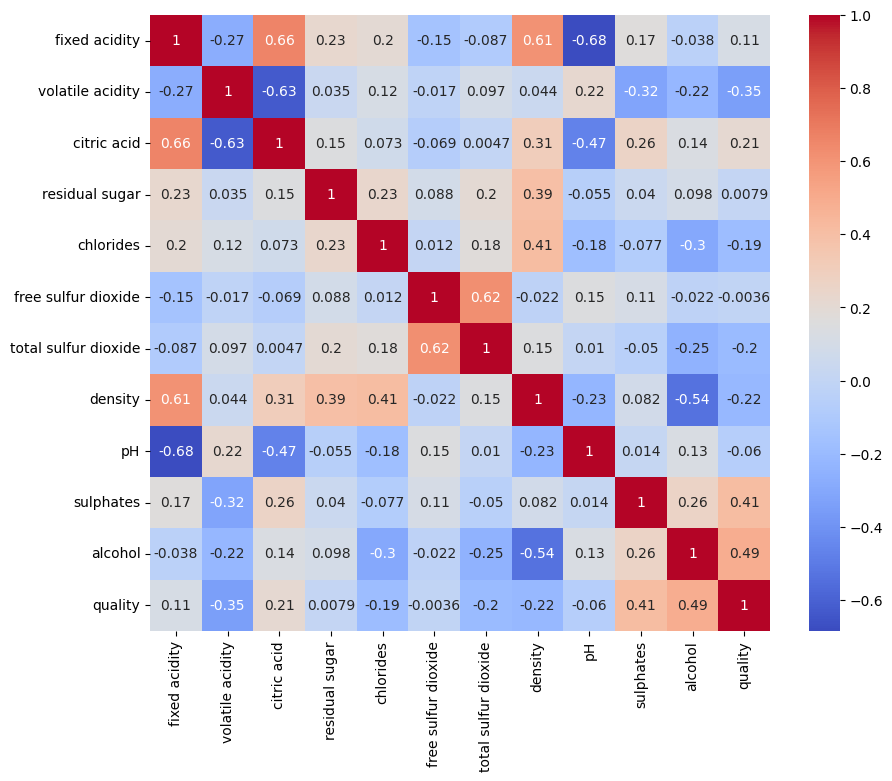

In [98]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

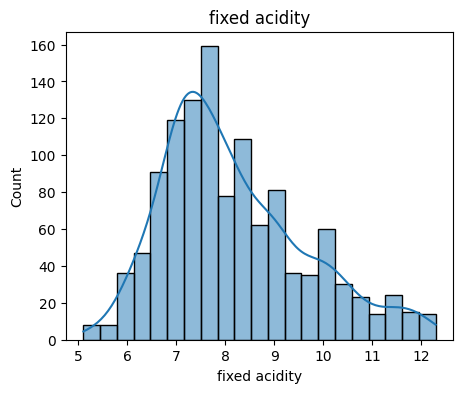

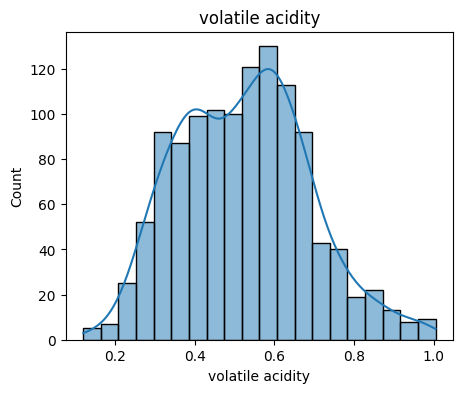

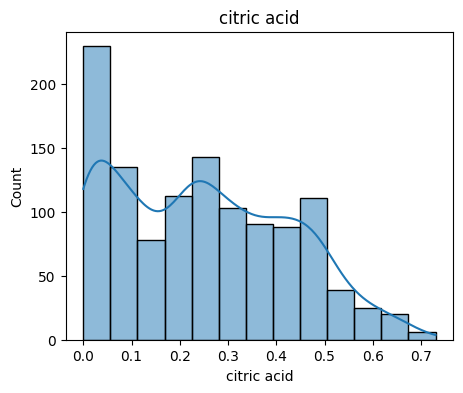

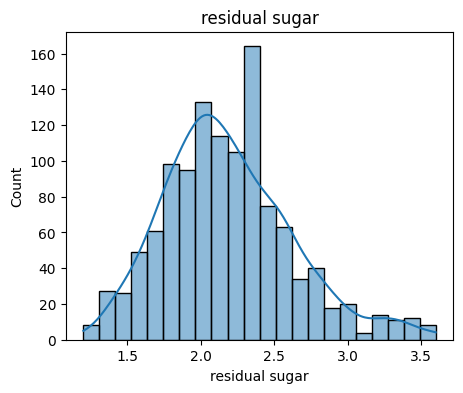

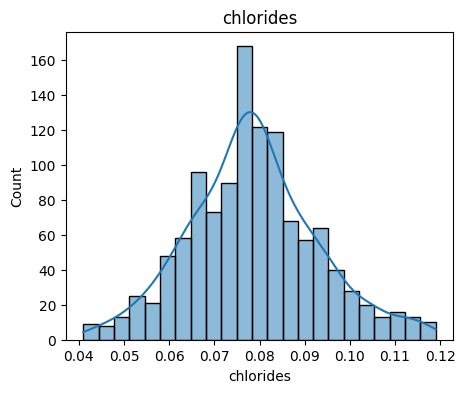

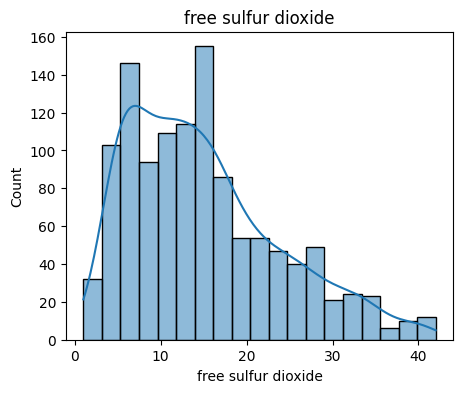

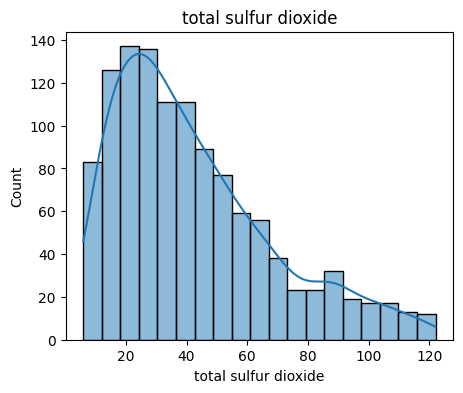

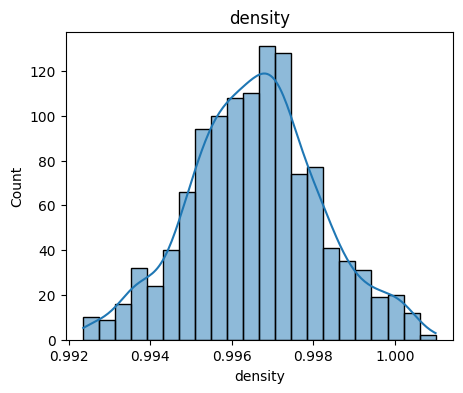

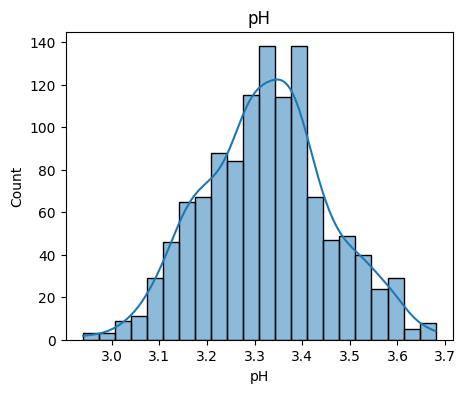

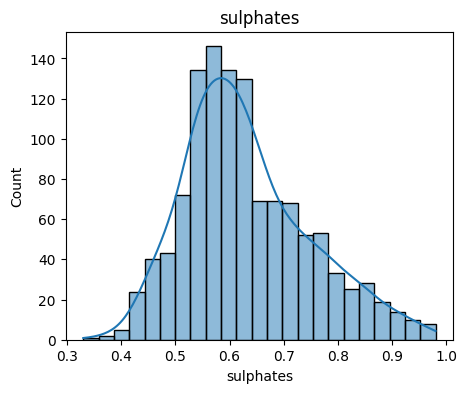

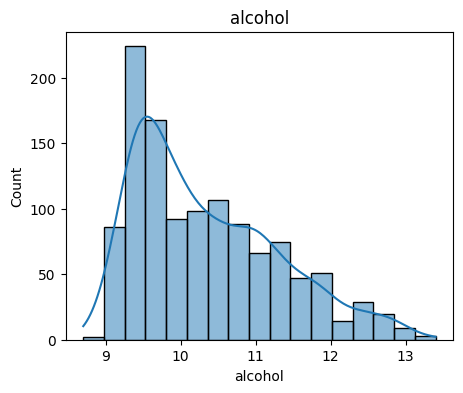

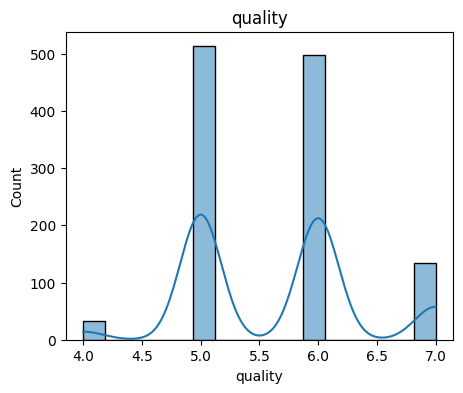

In [99]:
for col in df.columns:
  plt.figure(figsize = (5,4))
  sns.histplot(df[col], kde = True)
  plt.xlabel(col)
  plt.title(col)
  plt.show()

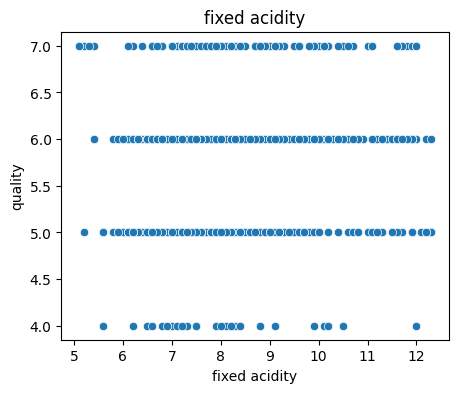

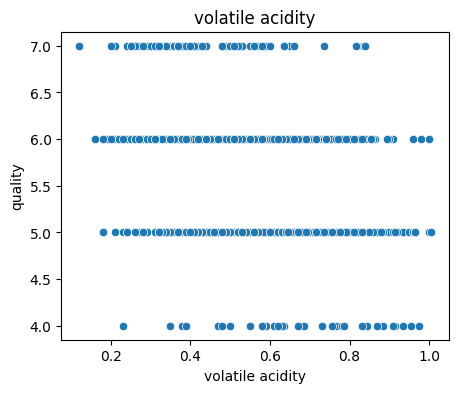

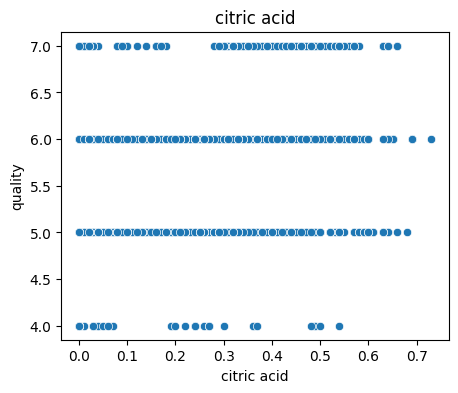

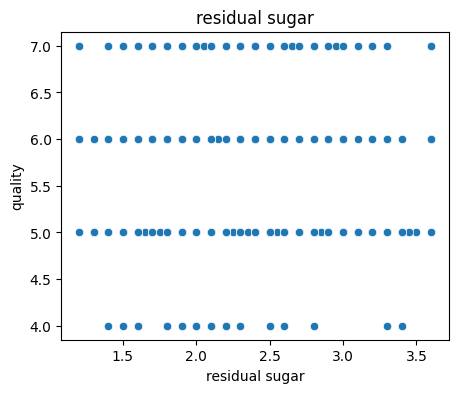

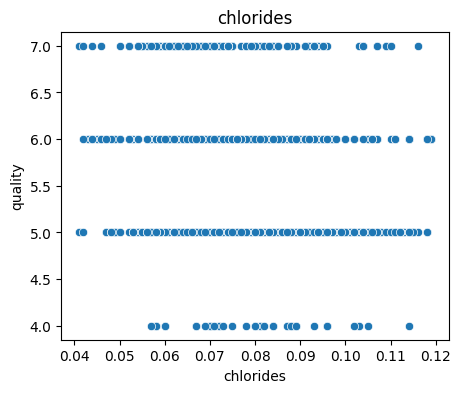

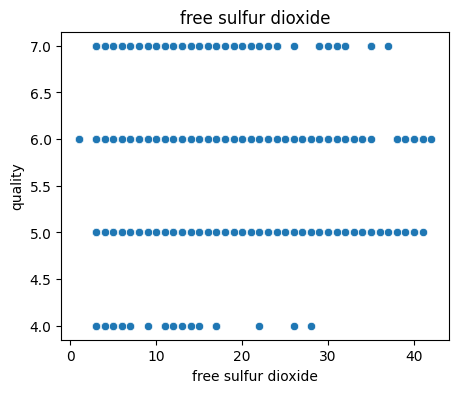

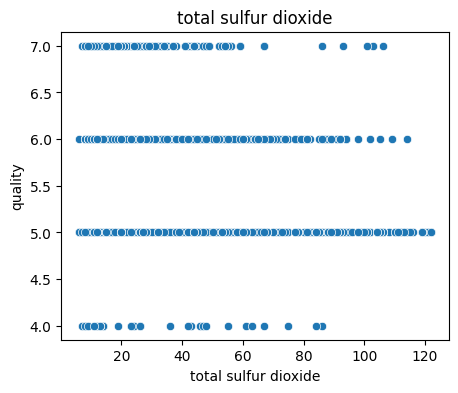

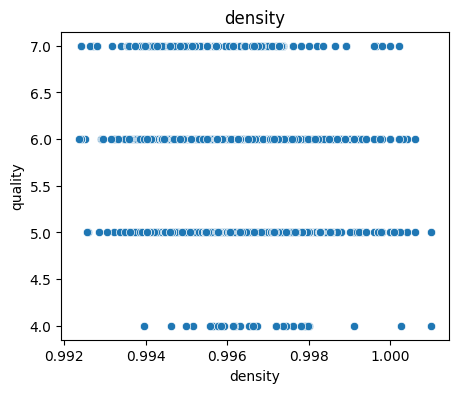

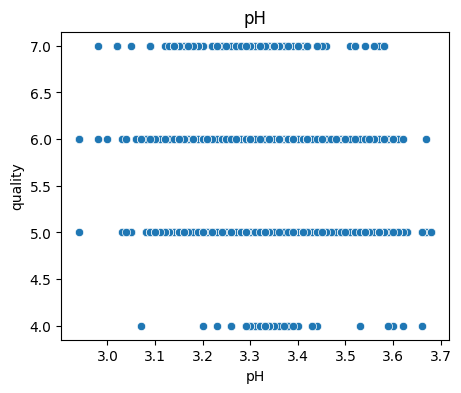

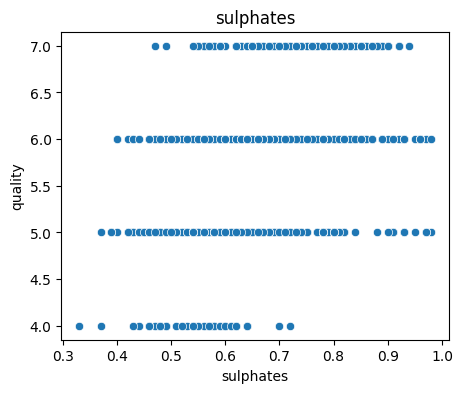

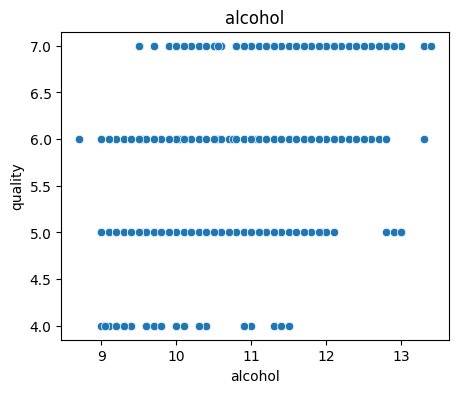

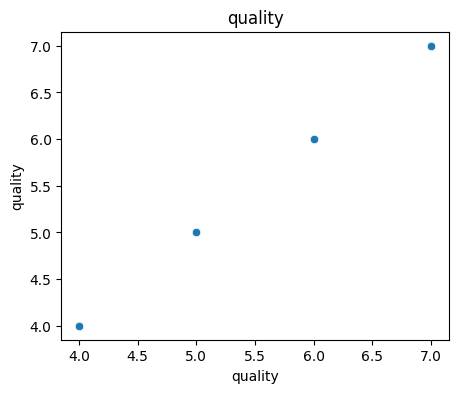

In [100]:
for col in df.columns:
  plt.figure(figsize = (5,4))
  sns.scatterplot(data = df, x=col, y='quality')
  plt.xlabel(col)
  plt.title(col)
  plt.show()

In [101]:
df['quality'].value_counts()

,count
quality,
5,513
6,498
7,135
4,33


In [102]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = df.drop('quality', axis= 1)
y = df['quality']




In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
models = {
    'linear_regression': LinearRegression(),
    'random_forest': RandomForestClassifier(),
    'logistic_regression': LogisticRegression(),
    'svm': SVC()
}

In [107]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'{name}:')
  if name == 'linear_regression':
      print('mean_squared_error:', mean_squared_error(y_test, y_pred))
      print('r2_score:', r2_score(y_test, y_pred))
  else:
      print('Accuracy:', accuracy_score(y_test, y_pred))
      print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
      print('Classification Report:\n', classification_report(y_test, y_pred))

linear_regression:
mean_squared_error: 0.12221576396419134
r2_score: -0.2466903277929675
random_forest:
Accuracy: 0.9364406779661016
Confusion Matrix:
 [[203   7]
 [  8  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       210
           1       0.72      0.69      0.71        26

    accuracy                           0.94       236
   macro avg       0.84      0.83      0.84       236
weighted avg       0.94      0.94      0.94       236

logistic_regression:
Accuracy: 0.847457627118644
Confusion Matrix:
 [[178  32]
 [  4  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       210
           1       0.41      0.85      0.55        26

    accuracy                           0.85       236
   macro avg       0.69      0.85      0.73       236
weighted avg       0.92      0.85      0.87       236

svm:
Accuracy: 0.906779661016949

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'n_estimators': [100,200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,5,10]
}

grid_searchCV = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,  scoring='accuracy')
grid_searchCV.fit(X_train, y_train)

print("Best parameters:", grid_searchCV.best_params_)
print("Best cross-validation score:", grid_searchCV.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.941851432270594


Accuracy: 0.923728813559322
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       210
           1       0.62      0.77      0.69        26

    accuracy                           0.92       236
   macro avg       0.80      0.86      0.82       236
weighted avg       0.93      0.92      0.93       236



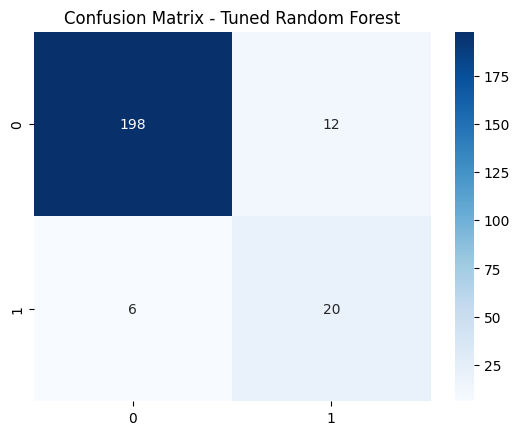

In [109]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [110]:
rf_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))


Accuracy: 0.923728813559322
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       210
           1       0.62      0.77      0.69        26

    accuracy                           0.92       236
   macro avg       0.80      0.86      0.82       236
weighted avg       0.93      0.92      0.93       236

